In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
import plotly.express as px
import random
from sklearn.preprocessing import MinMaxScaler

sys.path.append(os.path.abspath('../src/'))
from ActivationFunctions import *
from NeuralNetwork import *
from MyUtils import *

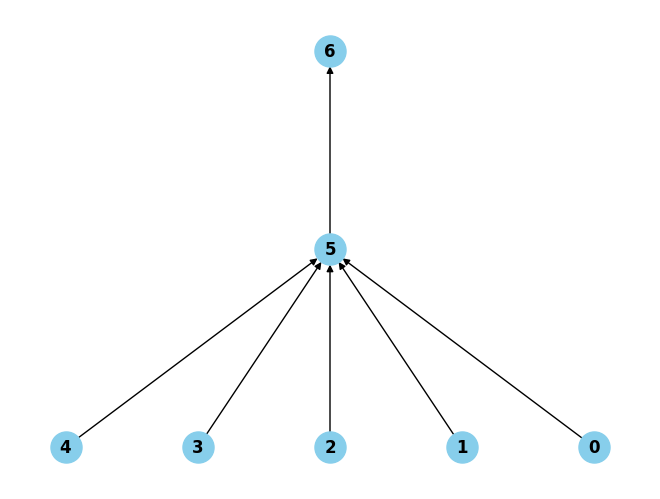

In [2]:
TR_INPUT = 5
TR_OUTPUT = 1
topology = create_stratified_topology([TR_INPUT,1,TR_OUTPUT],[[None,[]], [None,[]], [None,[]], [None,[]],[None,[]], ['identity', []], ['identity', []]])
NeuralNetwork.display_topology(topology)

In [3]:
topology

{0: ['input_0', None, [], [5]],
 1: ['input_0', None, [], [5]],
 2: ['input_0', None, [], [5]],
 3: ['input_0', None, [], [5]],
 4: ['input_0', None, [], [5]],
 5: ['hidden_1', 'identity', [], [6]],
 6: ['output_2', 'identity', [], []]}

In [4]:
NN = NeuralNetwork(topology, -0.75, 0.75, True, RANDOM_STATE)

In [5]:
len_dataset = 1010
len_training = 1000
len_validation = 10

#f1 = lambda x : x[1]**2 + x[1]*5 + x[0]**2 + x[0]*5 if (x[0] > 0 and x[1] > 0) or (x[0] < 0 and x[1] < 0) else -x[1]**2 -x[1]*5 - x[0]**2 -x[0]*5
#f2 = lambda x : 3*x[0]**3 - 20*x[1]**2 + 2 
#f3 = lambda x : 2*math.log(abs(x[0]*5)) - 2*math.log(abs(x[1]*5)) + 1
f4 = lambda x : 2*x[0] + 3*x[1] + 4*x[2] - 2*x[3] - x[4]

dummy = create_dataset(len_dataset, TR_INPUT, [-10, 10], 
                      [f4],
                       #f2,
                       #f3],
                      RANDOM_STATE)

tr_df = dummy[:len_training]
val_df = dummy[-len_validation:]
tr_df.sample(10, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,output_1
144,8.089695,-0.625198,-6.711027,7.927719,9.004870,-37.400620
833,7.573144,7.290678,-6.061458,5.414497,-8.074072,10.017568
270,6.275259,-1.488466,-8.753429,-5.485449,7.177669,-23.135366
468,1.173421,-2.440722,1.796709,-1.822252,9.318333,-3.462317
962,-9.904876,3.420050,-6.175262,-0.005805,-3.914944,-30.324099
186,-4.053000,-3.949021,-7.473667,-1.194720,9.521383,-56.979672
942,3.027064,-6.750850,-0.949807,-2.845072,-6.352673,-5.954832
516,2.570557,2.095630,-3.256937,0.985203,8.422241,-11.992392
286,-2.697881,-4.066771,9.243127,7.274222,5.748323,-0.920333
458,4.073066,-8.797363,1.172091,6.186147,-5.173901,-20.755987


In [6]:
scaler_out = MinMaxScaler()
scaler_in = MinMaxScaler()
scaler_in.fit(tr_df.values[:,:TR_INPUT])
scaler_out.fit(tr_df.values[:,TR_INPUT:])

tr_normalized = np.empty((len_training, TR_OUTPUT+TR_INPUT))
tr_normalized[:,:TR_INPUT] = scaler_in.transform(tr_df.values[:,:TR_INPUT])
tr_normalized[:,TR_INPUT:] = scaler_out.transform(tr_df.values[:,TR_INPUT:])

val_normalized = np.empty((len_validation, TR_OUTPUT+TR_INPUT))
val_normalized[:,:TR_INPUT] = scaler_in.transform(val_df.values[:,:TR_INPUT])
val_normalized[:,TR_INPUT:] = scaler_out.transform(val_df.values[:,TR_INPUT:])

In [7]:
tr_df_normalized = pd.DataFrame(data = tr_normalized, columns=tr_df.columns)
val_df_normalized = pd.DataFrame(data = val_normalized, columns=tr_df.columns)

In [8]:
training_set = tr_df.values
validation_set = val_df.values
metrics = [ErrorFunctions.mean_squared_error, ] #ErrorFunctions.mean_euclidean_error, 

batch_size = 25
max_epochs = 5000
error_decrease_tolerance = 0.000001
patience = 10

lambda_tikhonov = 0.00001
alpha_momentum = 0.25
learning_rate = 0.01/batch_size
# beacause of the momentum is used the learning rate needs to be a little less?!?!?

collect_datas = True
collect_datas_batch = False # per il momento. molto costoso!!!! False di default
verbose = True

stats = NN.train(tr_normalized, val_normalized, batch_size, max_epochs, error_decrease_tolerance, patience, 
                   learning_rate, lambda_tikhonov, alpha_momentum, metrics, collect_datas, collect_datas_batch, verbose)

starting values:  {'training_set_len': 1000, 'minibatch_size': 25, 'max_epochs': 5000, 'error_decrease_tolerance': 1e-06, 'patience': 10, 'learning_rate': 0.0004, 'lambda_tikhonov': 1e-05, 'alpha_momentum': 0.25, 'epochs': 0, 'total_train_time': datetime.timedelta(0), 'mean_epoch_train_time': 0, 'units_weights': {5: [], 6: []}, 'units_weights_batch': {5: [], 6: []}, 'training_mean_squared_error': [], 'validation_mean_squared_error': [], 'training_batch_mean_squared_error': [], 'validation_batch_mean_squared_error': []}
[1/5000] time: 0:00:00.098992 |mean_squared_error: tr=0.0501489835220935 val=0.06186854245982881| 
[2/5000] time: 0:00:00.116032 |mean_squared_error: tr=0.04807893707767643 val=0.05859736305853881| 
[3/5000] time: 0:00:00.092811 |mean_squared_error: tr=0.04611007382759561 val=0.05551888600571384| 
[4/5000] time: 0:00:00.091000 |mean_squared_error: tr=0.04423787650223292 val=0.052617454943512464| 
[5/5000] time: 0:00:00.095000 |mean_squared_error: tr=0.04245695310904058 v

In [9]:
tr_predictions_normalized = NN.predict_array(tr_normalized[:,:TR_INPUT])
tr_predictions = scaler_out.inverse_transform(tr_predictions_normalized)

In [10]:
pd.options.mode.chained_assignment = None
prediction_col = ['prediction_1']#, 'prediction_2', 'prediction_3']
tr_df[prediction_col] = tr_predictions
for col in prediction_col:
    tr_df[col + '_err'] = (tr_df[col] - tr_df['output_' + col[-1]])**2
    tr_df[prediction_col] = tr_predictions


tr_df_normalized[prediction_col] = tr_predictions_normalized
for col in prediction_col:
    tr_df_normalized[col + '_err'] = (tr_df_normalized[col] - tr_df_normalized['output_' + col[-1]])**2
    tr_df_normalized[prediction_col] = tr_predictions_normalized

In [11]:
tr_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,output_1,prediction_1,prediction_1_err
144,8.089695,-0.625198,-6.711027,7.927719,9.004870,-37.400620,-38.068447,0.445993
833,7.573144,7.290678,-6.061458,5.414497,-8.074072,10.017568,9.239552,0.605309
270,6.275259,-1.488466,-8.753429,-5.485449,7.177669,-23.135366,-23.128826,0.000043
468,1.173421,-2.440722,1.796709,-1.822252,9.318333,-3.462317,-3.892210,0.184808
962,-9.904876,3.420050,-6.175262,-0.005805,-3.914944,-30.324099,-29.302787,1.043079


In [12]:
val_predictions_normalized = NN.predict_array(val_normalized[:,:TR_INPUT])
val_predictions = scaler_out.inverse_transform(val_predictions_normalized)

In [13]:
val_df[prediction_col] = val_predictions
for col in prediction_col:
    val_df[col + '_err'] = (val_df[col] - val_df['output_' + col[-1]])**2
    val_df[prediction_col] = val_predictions

val_df_normalized[prediction_col] = val_predictions_normalized
for col in prediction_col:
    val_df_normalized[col + '_err'] = (val_df_normalized[col] - val_df_normalized['output_' + col[-1]])**2
    val_df_normalized[prediction_col] = val_predictions_normalized

In [14]:
val_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,input_4,input_5,output_1,prediction_1,prediction_1_err
1000,-3.795222,-8.370641,5.294138,4.284607,-5.604401,-14.490630,-13.802871,0.473013
1007,-6.783807,-7.430240,-8.232131,7.776321,9.276771,-93.616271,-92.274333,1.800800
1003,3.879968,-3.197675,-9.350492,-2.850581,7.861842,-41.395736,-41.046150,0.122210
1009,3.345840,-5.753338,-9.782213,4.223835,9.846920,-67.991776,-67.508618,0.233442
1006,1.282280,9.889429,-5.017188,2.657381,0.460470,6.388866,5.572263,0.666840


In [15]:
for key in list(stats.keys())[:9]:
    print(key, ':', stats[key])

training_set_len : 1000
minibatch_size : 25
max_epochs : 5000
error_decrease_tolerance : 1e-06
patience : 10
learning_rate : 0.0004
lambda_tikhonov : 1e-05
alpha_momentum : 0.25
epochs : 1101


In [29]:
for met in metrics:
    print('last training ' + met.__name__ + ' :', stats['training_' + met.__name__][-1])
    print('last validation ' + met.__name__ + ' :', stats['training_' + met.__name__][-1])

last training mean_squared_error : 2.3296992369760848e-05
last validation mean_squared_error : 2.3296992369760848e-05


In [ ]:
for met in metrics:
    print('last training ' + met.__name__ + ' :', stats['training_' + met.__name__][-1])
    print('last validation ' + met.__name__ + ' :', stats['training_' + met.__name__][-1])

last training mean_squared_error : 2.3296992369760848e-05
last validation mean_squared_error : 2.3296992369760848e-05


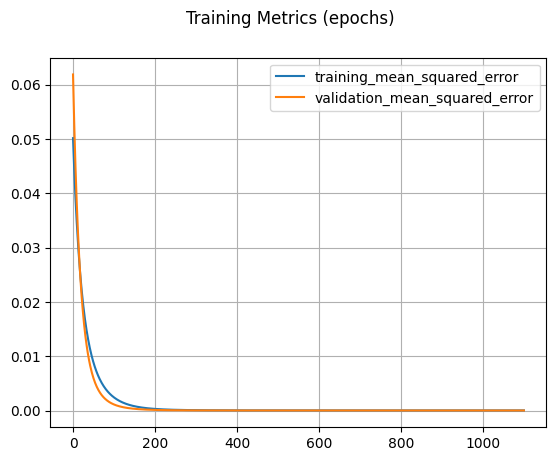

In [18]:
if len(metrics) > 1:
    fig, ax = plt.subplots(1, len(metrics), figsize=(10, 5))
    plt.suptitle('Training Metrics (epochs)')
    for i in range(len(metrics)):
        multy_plot([stats['training_' + metrics[i].__name__], stats['validation_' + metrics[i].__name__]], 
                ['training_' + metrics[i].__name__, 'validation_' + metrics[i].__name__],
                ax=ax[i])
else:
    plt.suptitle('Training Metrics (epochs)')
    multy_plot([stats['training_' + metrics[0].__name__], stats['validation_' + metrics[0].__name__]], 
                ['training_' + metrics[0].__name__, 'validation_' + metrics[0].__name__])

In [19]:

'''plt.suptitle('Training Metrics (epochs)')
for i in range(len(metrics)):
    multy_plot([stats_0['training_' + metrics[i].__name__], stats_0['validation_' + metrics[i].__name__]] + 
               [stats_1['training_' + metrics[i].__name__], stats_1['validation_' + metrics[i].__name__]] +
               [stats_2['training_' + metrics[i].__name__], stats_2['validation_' + metrics[i].__name__]] +
               [stats_3['training_' + metrics[i].__name__], stats_3['validation_' + metrics[i].__name__]],
            ['tr_0.0', 'val_0.0', 'tr_0.25', 'val_0.25', 'tr_0.5', 'val_0.5', 'tr_0.75', 'val_0.75', 'tr_0.95', 'val_0.95',], 
            title='Training Metrics (epochs)')'''

"plt.suptitle('Training Metrics (epochs)')\nfor i in range(len(metrics)):\n    multy_plot([stats_0['training_' + metrics[i].__name__], stats_0['validation_' + metrics[i].__name__]] + \n               [stats_1['training_' + metrics[i].__name__], stats_1['validation_' + metrics[i].__name__]] +\n               [stats_2['training_' + metrics[i].__name__], stats_2['validation_' + metrics[i].__name__]] +\n               [stats_3['training_' + metrics[i].__name__], stats_3['validation_' + metrics[i].__name__]],\n            ['tr_0.0', 'val_0.0', 'tr_0.25', 'val_0.25', 'tr_0.5', 'val_0.5', 'tr_0.75', 'val_0.75', 'tr_0.95', 'val_0.95',], \n            title='Training Metrics (epochs)')"

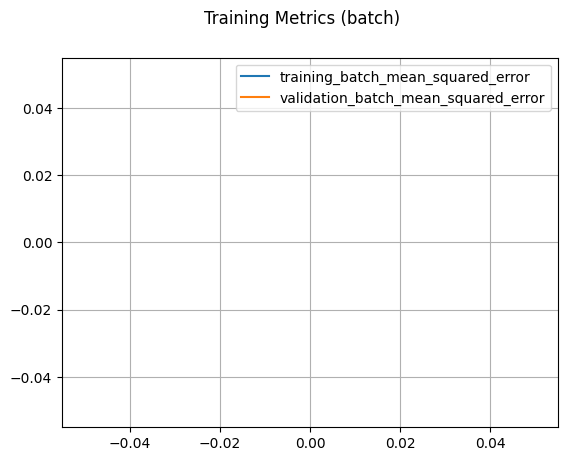

In [20]:
if len(metrics) > 1:
    fig, ax = plt.subplots(1, len(metrics), figsize=(10, 5))
    plt.suptitle('Learning Curve (batch)')
    for i in range(len(metrics)):
        multy_plot([stats['training_batch_' + metrics[i].__name__], stats['validation_batch_' + metrics[i].__name__]], 
                ['training_batch_' + metrics[i].__name__, 'validation_batch_' + metrics[i].__name__],
                ax=ax[i])
    plt.show()
else:
    plt.suptitle('Training Metrics (batch)')
    multy_plot([stats['training_batch_' + metrics[0].__name__], stats['validation_batch_' + metrics[0].__name__]], 
                ['training_batch_' + metrics[0].__name__, 'validation_batch_' + metrics[0].__name__])

In [21]:
'''plt.suptitle('Training Metrics (epochs)')
for i in range(len(metrics)):
    multy_plot([stats_0['training_batch_' + metrics[i].__name__], stats_0['validation_batch_' + metrics[i].__name__]] + 
               [stats_1['training_batch_' + metrics[i].__name__], stats_1['validation_batch_' + metrics[i].__name__]] +
               [stats_2['training_batch_' + metrics[i].__name__], stats_2['validation_batch_' + metrics[i].__name__]] +
               [stats_3['training_batch_' + metrics[i].__name__], stats_3['validation_batch_' + metrics[i].__name__]] + 
               [stats_4['training_batch_' + metrics[i].__name__], stats_4['validation_batch_' + metrics[i].__name__]],
            ['tr_0.0', 'val_0.0', 'tr_0.25', 'val_0.25', 'tr_0.5', 'val_0.5', 'tr_0.75', 'val_0.75', 'tr_0.95', 'val_0.95',], 
            title='Training Metrics (epochs)')'''

"plt.suptitle('Training Metrics (epochs)')\nfor i in range(len(metrics)):\n    multy_plot([stats_0['training_batch_' + metrics[i].__name__], stats_0['validation_batch_' + metrics[i].__name__]] + \n               [stats_1['training_batch_' + metrics[i].__name__], stats_1['validation_batch_' + metrics[i].__name__]] +\n               [stats_2['training_batch_' + metrics[i].__name__], stats_2['validation_batch_' + metrics[i].__name__]] +\n               [stats_3['training_batch_' + metrics[i].__name__], stats_3['validation_batch_' + metrics[i].__name__]] + \n               [stats_4['training_batch_' + metrics[i].__name__], stats_4['validation_batch_' + metrics[i].__name__]],\n            ['tr_0.0', 'val_0.0', 'tr_0.25', 'val_0.25', 'tr_0.5', 'val_0.5', 'tr_0.75', 'val_0.75', 'tr_0.95', 'val_0.95',], \n            title='Training Metrics (epochs)')"

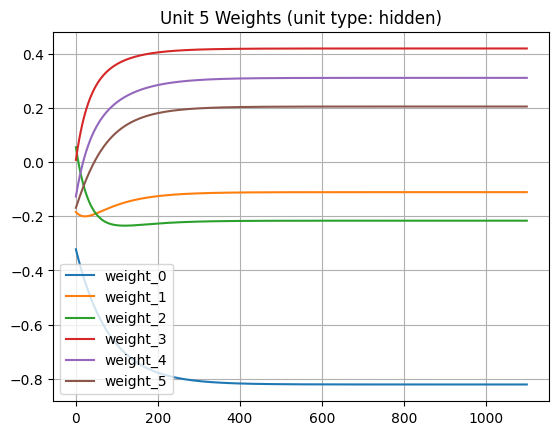

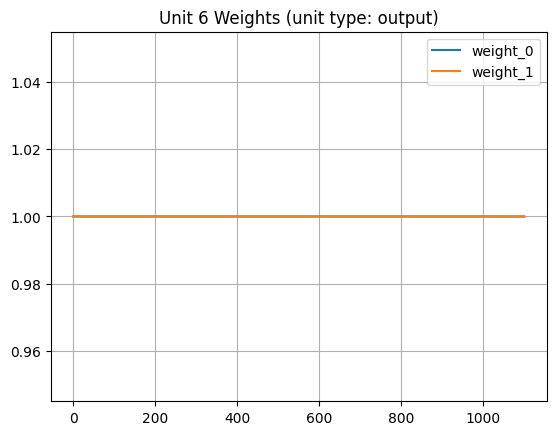

In [22]:
for unit_index in stats['units_weights'].keys():
    vals = np.array(stats['units_weights'][unit_index]).T
    multy_plot(vals, 
               ['weight_' + str(i) for i in range(len(vals))], 
               'Unit ' + str(unit_index) + ' Weights (unit type: ' + NN.neurons[unit_index].type + ')')

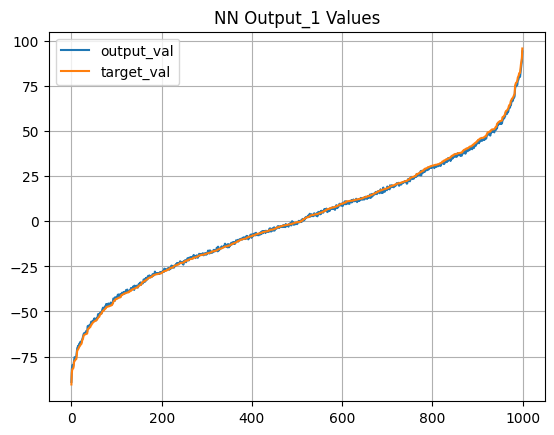

In [23]:
for i in range(TR_OUTPUT):
    sorted_order = training_set[:, TR_INPUT + i].argsort()
    multy_plot([tr_predictions[sorted_order][:,i] , training_set[sorted_order][:,TR_INPUT + i]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')

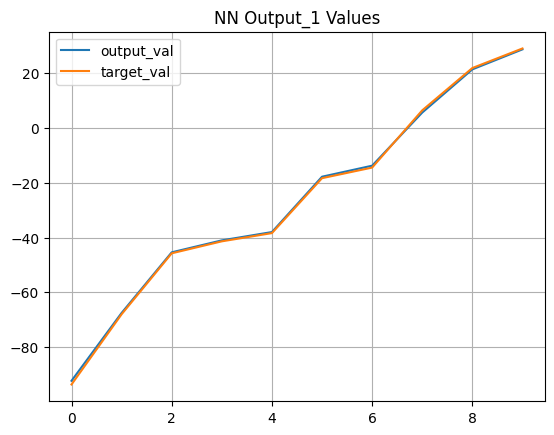

In [24]:
for i in range(TR_OUTPUT):
    sorted_order = validation_set[:, TR_INPUT + i].argsort()
    multy_plot([val_predictions[sorted_order][:,i] , validation_set[sorted_order][:,TR_INPUT + i]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')

Tot points: 1000


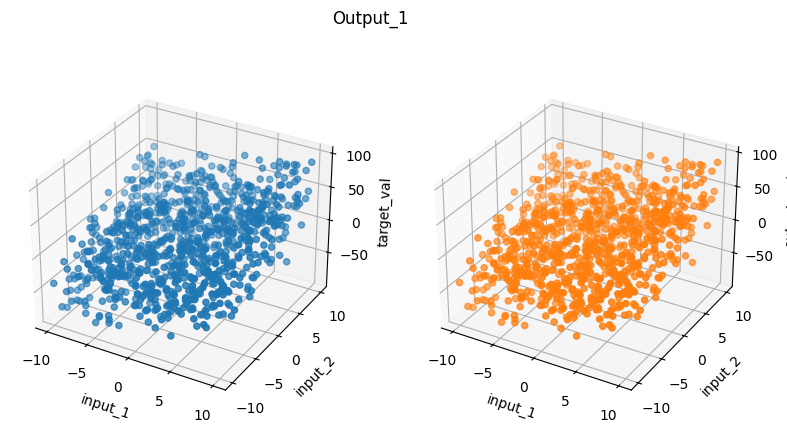

In [25]:
multy_plot_3d([training_set[:,0], training_set[:,0]], 
              [training_set[:,1], training_set[:,1]],
              [training_set[:,TR_INPUT], tr_predictions[:,0]],
              [['input_1', 'input_2', 'target_val'], ['input_1', 'input_2', 'output_val']],
              'Output_1');

In [26]:
interactive_3d_plot(tr_df_normalized, 'input_1', 'input_2', 'prediction_1', 'prediction_1_err')

Tot points: 1000


In [27]:
interactive_3d_plot(tr_df_normalized, 'input_1', 'input_2', 'output_1', 'prediction_1_err')

Tot points: 1000
